In [2]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

In [3]:
def data(dataset_path):
    images = []
    labels = []
    for subfolder in os.listdir(dataset_path):
        subfolder_path = os.path.join(dataset_path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            if image_filename.endswith(".jpg"):
                image_path = os.path.join(subfolder_path, image_filename)
                images.append(image_path)
                labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df

In [4]:
#train
train=data(r"C:\Users\DELL\Downloads\dataset\train")
train.head()

image      label
0  C:\Users\DELL\Downloads\dataset\train\fracture...  fractured
1  C:\Users\DELL\Downloads\dataset\train\fracture...  fractured
2  C:\Users\DELL\Downloads\dataset\train\fracture...  fractured
3  C:\Users\DELL\Downloads\dataset\train\fracture...  fractured
4  C:\Users\DELL\Downloads\dataset\train\fracture...  fractured

In [5]:
#test
test=data(r"C:\Users\DELL\Downloads\dataset\test")
test.head()

image      label
0  C:\Users\DELL\Downloads\dataset\test\fractured...  fractured
1  C:\Users\DELL\Downloads\dataset\test\fractured...  fractured
2  C:\Users\DELL\Downloads\dataset\test\fractured...  fractured
3  C:\Users\DELL\Downloads\dataset\test\fractured...  fractured
4  C:\Users\DELL\Downloads\dataset\test\fractured...  fractured

In [6]:
#val
val=data(r"C:\Users\DELL\Downloads\dataset\val")
val.head()

image      label
0  C:\Users\DELL\Downloads\dataset\val\fractured\...  fractured
1  C:\Users\DELL\Downloads\dataset\val\fractured\...  fractured
2  C:\Users\DELL\Downloads\dataset\val\fractured\...  fractured
3  C:\Users\DELL\Downloads\dataset\val\fractured\...  fractured
4  C:\Users\DELL\Downloads\dataset\val\fractured\...  fractured

In [23]:
print(f"Total training images: {train.shape[0]}")
print(f"Total validation images: {val.shape[0]}")
print(f"Total test images: {test.shape[0]}")


Total training images: 4097
Total validation images: 404
Total test images: 399


In [24]:
print(train['label'].value_counts())
print(val['label'].value_counts())
print(test['label'].value_counts())


label
fractured        2078
not fractured    2019
Name: count, dtype: int64
label
not fractured    236
fractured        168
Name: count, dtype: int64
label
not fractured    200
fractured        199
Name: count, dtype: int64


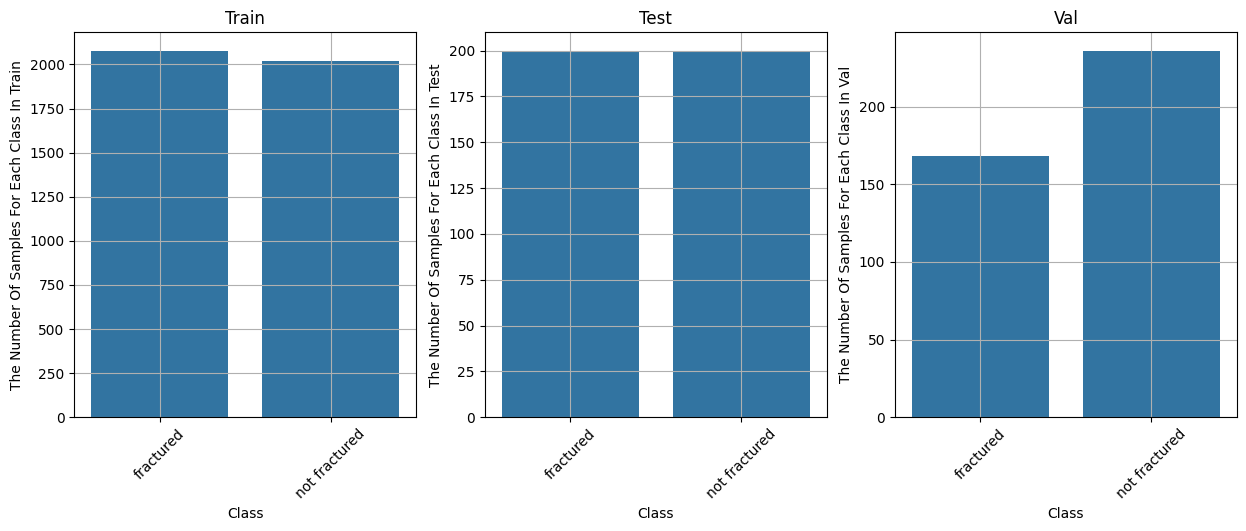

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
ax = sns.countplot(x=train.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Train")
plt.title('Train')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,2)
ax = sns.countplot(x=test.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Test")
plt.title('Test')
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,3,3)
ax = sns.countplot(x=val.label)
ax.set_xlabel("Class")
ax.set_ylabel("The Number Of Samples For Each Class In Val")
plt.title('Val')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

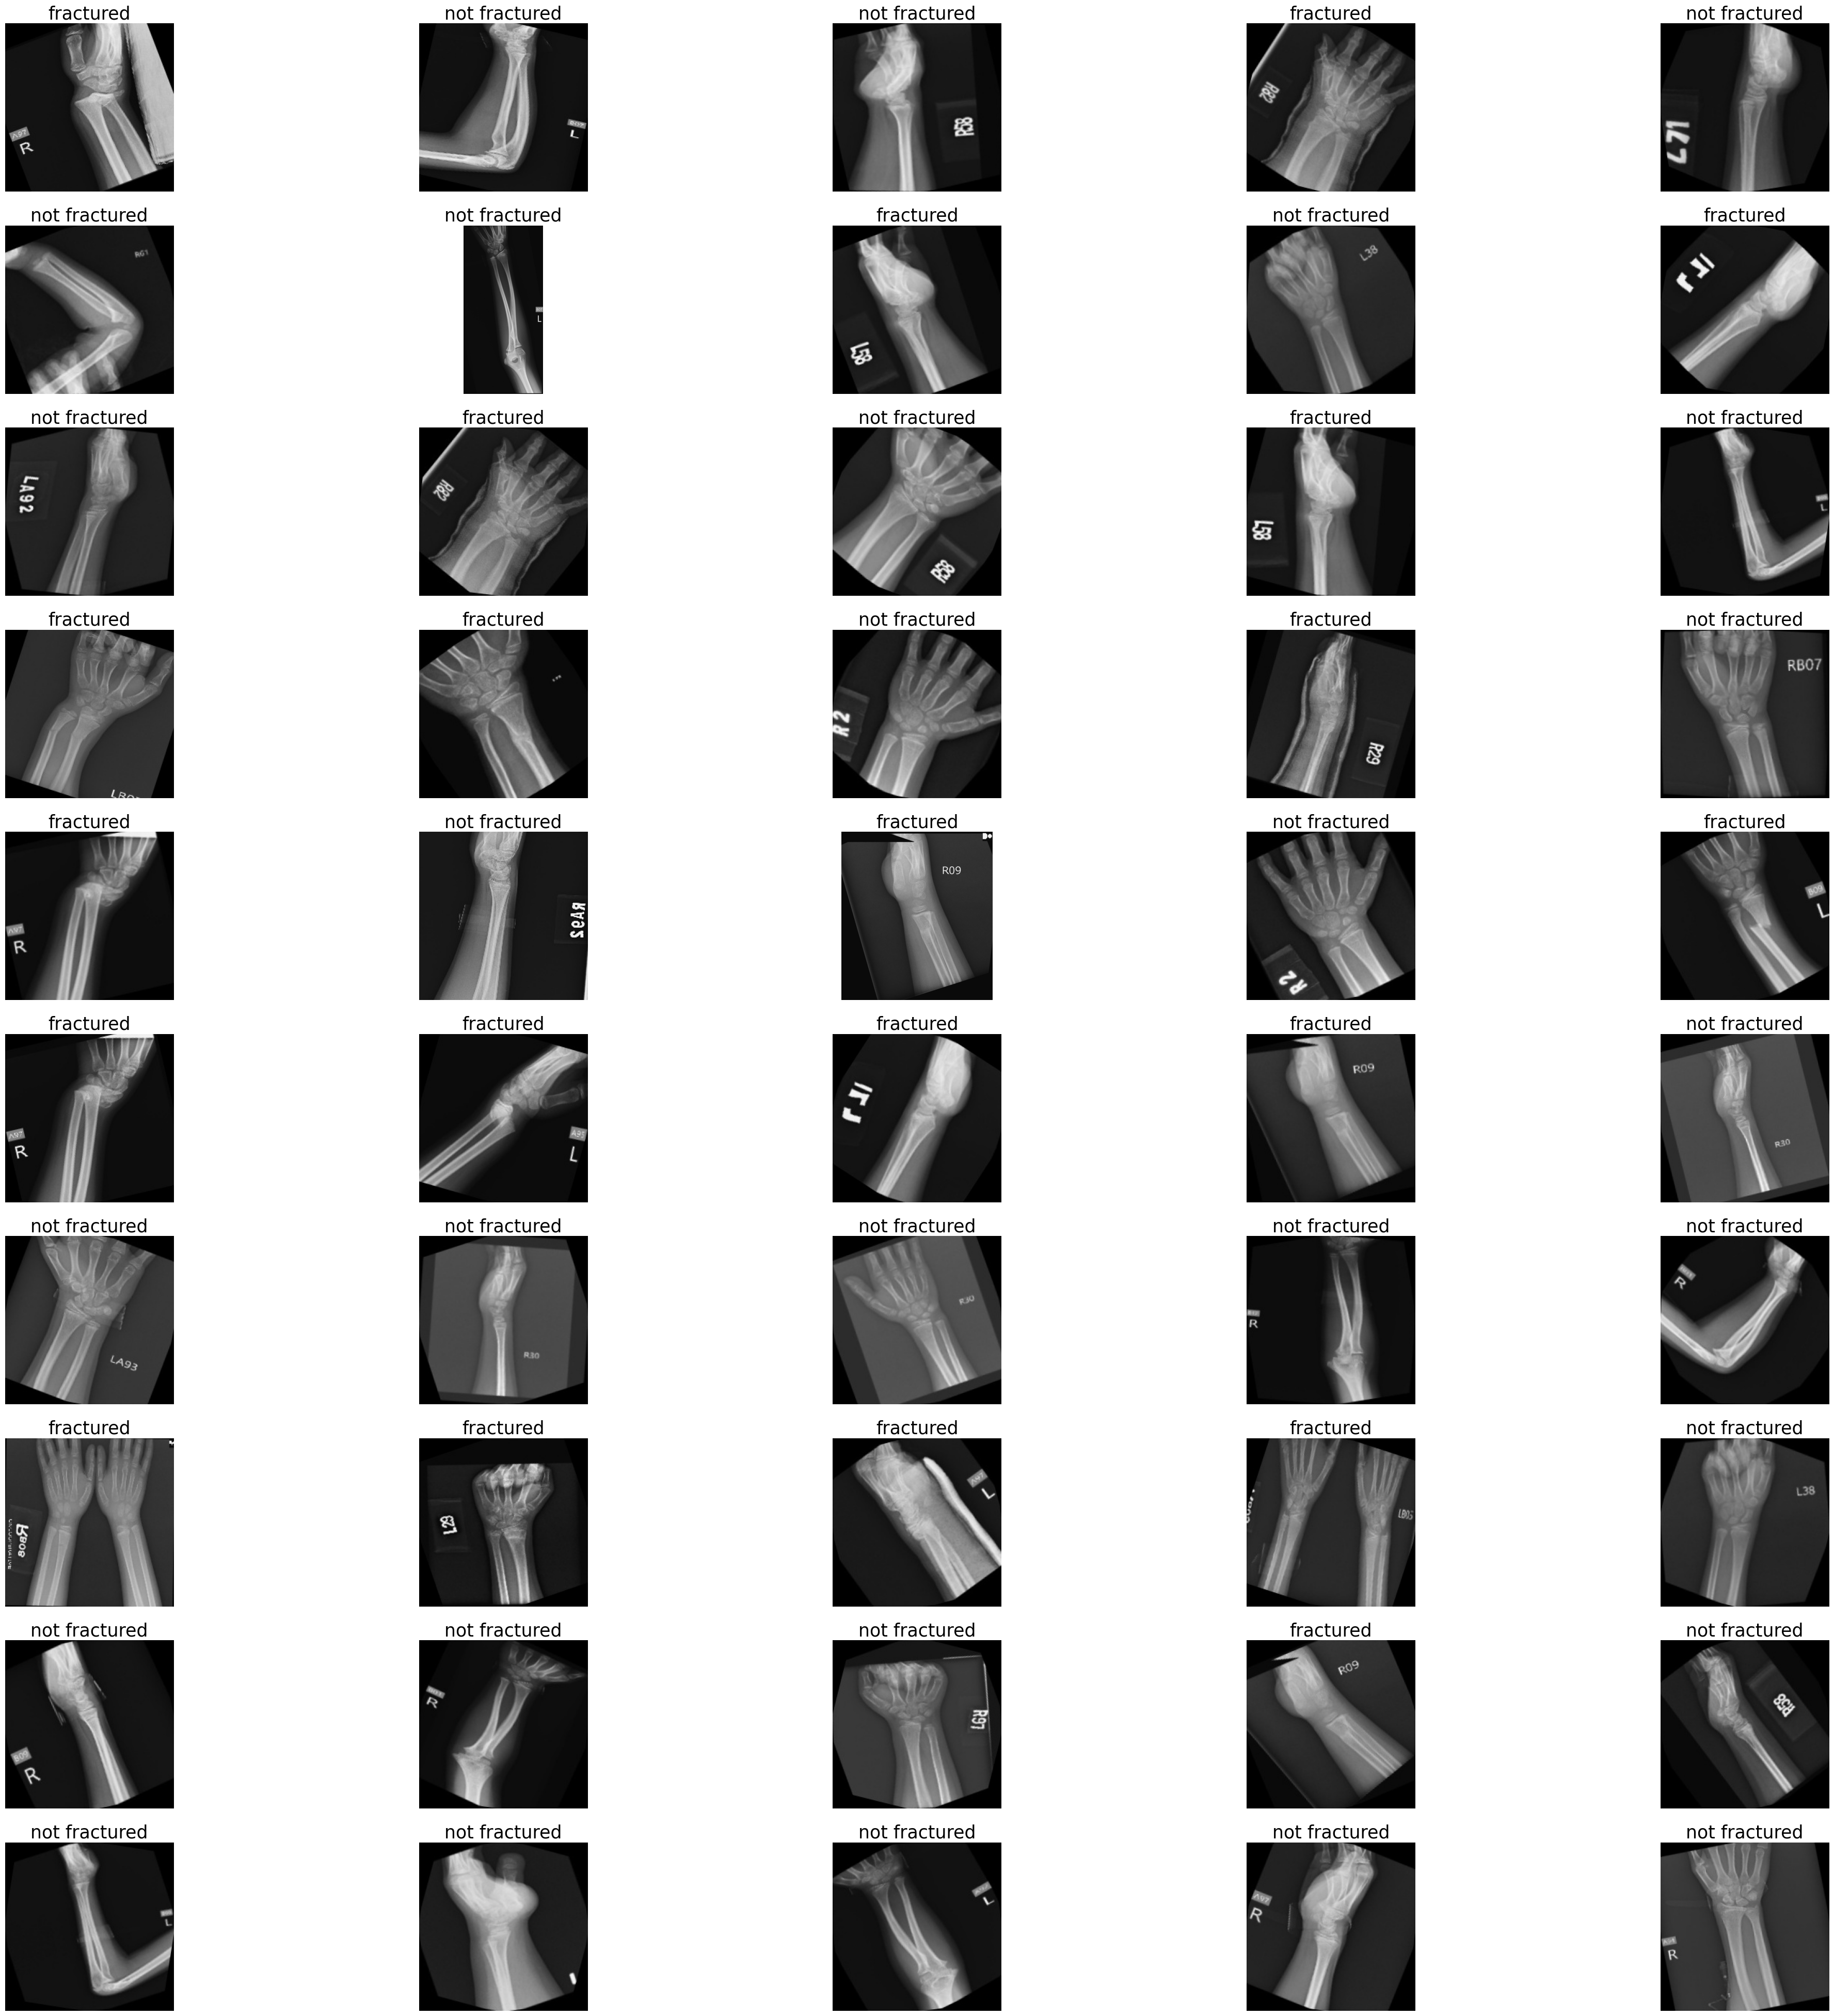

In [8]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(train),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(train.image[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(train.label[i],fontsize=25)

In [9]:
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255
)

In [10]:
train_data = datagen.flow_from_dataframe(
    train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 4097 validated image filenames belonging to 2 classes.


In [11]:
test_data = datagen.flow_from_dataframe(
    test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 399 validated image filenames belonging to 2 classes.


In [12]:
val_data = datagen.flow_from_dataframe(
    val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

Found 404 validated image filenames belonging to 2 classes.


In [13]:
class_num=1
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation=tf.nn.relu,input_shape=(224,224,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2)))  
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation=tf.nn.relu)) 
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Conv2D(filters=128, kernel_size=(3,3),activation=tf.nn.relu))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2,2))) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation=tf.nn.relu))
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(keras.layers.Dropout(.3)) 
model.add(keras.layers.Dense(class_num,activation=tf.nn.sigmoid))
model.summary()

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,278,593 (84.99 MB)

 Trainable params: 22,278,145 (84.98 MB)

 Non-trainable params: 448 (1.75 KB)

In [14]:
checkpoint_cb =ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=5, restore_best_weights=True)
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5),keras.metrics.AUC()])
hist = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[checkpoint_cb, early_stopping_cb])


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6586 - auc: 0.6844 - loss: 6.1164 - specificity_at_sensitivity: 0.7497

129/129 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.6592 - auc: 0.6850 - loss: 6.0981 - specificity_at_sensitivity: 0.7503 - val_accuracy: 0.5842 - val_auc: 0.5000 - val_loss: 27.0070 - val_specificity_at_sensitivity: 0.0000e+00
Epoch 2/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8381 - auc: 0.8924 - loss: 1.1574 - specificity_at_sensitivity: 0.9175

129/129 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8383 - auc: 0.8926 - loss: 1.1556 - specificity_at_sensitivity: 0.9176 - val_accuracy: 0.5842 - val_auc: 0.5000 - val_loss: 18.4508 - val_specificity_at_sensitivity: 0.0000e+00
Epoch 3/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8994 - auc: 0.9445 - loss: 0.5696 - specificity_at_sensitivity: 0.9583

129/129 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.8994 - auc: 0.9446 - loss: 0.5693 - specificity_at_sensitivity: 0.9583 - val_accuracy: 0.6510 - val_auc: 0.6135 - val_loss: 10.4669 - val_specificity_at_sensitivity: 0.2381
Epoch 4/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9158 - auc: 0.9617 - loss: 0.3937 - specificity_at_sensitivity: 0.9822

129/129 ━━━━━━━━━━━━━━━━━━━━ 193s 1s/step - accuracy: 0.9159 - auc: 0.9618 - loss: 0.3931 - specificity_at_sensitivity: 0.9822 - val_accuracy: 0.7351 - val_auc: 0.7550 - val_loss: 3.1585 - val_specificity_at_sensitivity: 0.6012
Epoch 5/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9417 - auc: 0.9814 - loss: 0.2293 - specificity_at_sensitivity: 0.9873

129/129 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9417 - auc: 0.9814 - loss: 0.2296 - specificity_at_sensitivity: 0.9872 - val_accuracy: 0.9604 - val_auc: 0.9866 - val_loss: 0.1630 - val_specificity_at_sensitivity: 0.9762
Epoch 6/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 66s/step - accuracy: 0.9528 - auc: 0.9848 - loss: 0.1796 - specificity_at_sensitivity: 0.9898  

129/129 ━━━━━━━━━━━━━━━━━━━━ 8402s 66s/step - accuracy: 0.9528 - auc: 0.9848 - loss: 0.1795 - specificity_at_sensitivity: 0.9898 - val_accuracy: 0.9752 - val_auc: 0.9936 - val_loss: 0.0966 - val_specificity_at_sensitivity: 0.9940
Epoch 7/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9615 - auc: 0.9889 - loss: 0.1772 - specificity_at_sensitivity: 0.9941 - val_accuracy: 0.9678 - val_auc: 0.9864 - val_loss: 0.1382 - val_specificity_at_sensitivity: 0.9762
Epoch 8/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9651 - auc: 0.9900 - loss: 0.1243 - specificity_at_sensitivity: 0.9907

129/129 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9652 - auc: 0.9900 - loss: 0.1242 - specificity_at_sensitivity: 0.9907 - val_accuracy: 0.9901 - val_auc: 0.9997 - val_loss: 0.0247 - val_specificity_at_sensitivity: 1.0000
Epoch 9/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.9706 - auc: 0.9913 - loss: 0.1304 - specificity_at_sensitivity: 0.9956 - val_accuracy: 0.9530 - val_auc: 0.9921 - val_loss: 0.1511 - val_specificity_at_sensitivity: 0.9940
Epoch 10/10
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9736 - auc: 0.9946 - loss: 0.0832 - specificity_at_sensitivity: 0.9958

129/129 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.9736 - auc: 0.9946 - loss: 0.0833 - specificity_at_sensitivity: 0.9958 - val_accuracy: 0.9950 - val_auc: 1.0000 - val_loss: 0.0138 - val_specificity_at_sensitivity: 1.0000


In [15]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy       auc      loss  specificity_at_sensitivity  val_accuracy  \
0  0.729070  0.767914  3.735705                    0.826275      0.584158   
1  0.861118  0.911301  0.924741                    0.935034      0.584158   
2  0.899927  0.947262  0.524297                    0.964389      0.650990   
3  0.927508  0.969302  0.323383                    0.982676      0.735148   
4  0.939956  0.978132  0.256857                    0.985082      0.960396   
5  0.956065  0.987082  0.166096                    0.991819      0.975248   
6  0.959483  0.986183  0.188988                    0.989894      0.967822   
7  0.968514  0.992185  0.110749                    0.994225      0.990099   
8  0.971931  0.991104  0.123233                    0.993263      0.952970   
9  0.974127  0.993817  0.091695                    0.994225      0.995049   

    val_auc   val_loss  val_specificity_at_sensitivity  
0  0.500000  27.006996                        0.000000  
1  0.500000  18.450819                        0.000000  
2  0.613549  10.466878                        0.238095  
3  0.754981   3.158467                        0.601190  
4  0.986582   0.163006                        0.976190  
5  0.993556   0.096610                        0.994048  
6  0.986393   0.138173                        0.976190  
7  0.999685   0.024716                        1.000000  
8  0.992068   0.151068                        0.994048  
9  1.000000   0.013814                        1.000000

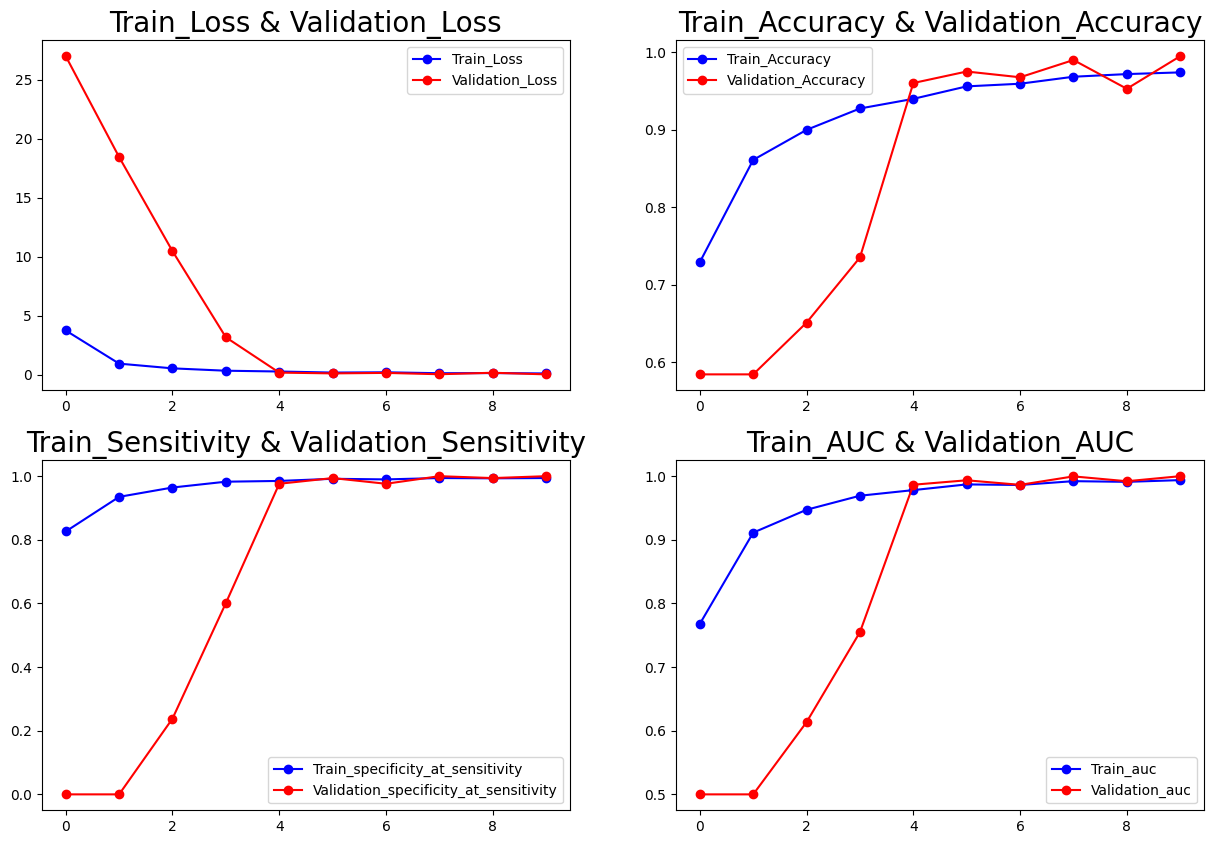

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist_['loss'],'b-o',label='Train_Loss')
plt.plot(hist_['val_loss'],'r-o',label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(2,2,2)
plt.plot(hist_['accuracy'],'b-o',label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],'r-o',label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.subplot(2,2,3)
plt.plot(hist_['specificity_at_sensitivity'],'b-o',label='Train_specificity_at_sensitivity')
plt.plot(hist_['val_specificity_at_sensitivity'],'r-o',label='Validation_specificity_at_sensitivity')
plt.title('Train_Sensitivity & Validation_Sensitivity',fontsize=20)
plt.legend()
plt.subplot(2,2,4)
plt.plot(hist_['auc'],'b-o',label='Train_auc')
plt.plot(hist_['val_auc'],'r-o',label='Validation_auc')
plt.title('Train_AUC & Validation_AUC',fontsize=20)
plt.legend()
plt.show()

In [16]:
test_loss, test_acc, specificity, auc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Specificity at Sensitivity 0.5: {specificity:.4f}")
print(f"AUC: {auc:.4f}")


C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 349ms/step - accuracy: 0.9895 - auc: 0.5705 - loss: 0.0364 - specificity_at_sensitivity: 0.5714   
Test Accuracy: 0.9799
Test Loss: 0.1059
Specificity at Sensitivity 0.5: 1.0000
AUC: 0.9967


In [20]:
y_test =test_data.classes
predictions = model.predict(test_data)
y_pred = np.where(predictions >= 0.5, 1, 0)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 182ms/step


Actual  Prediction
0         0           0
1         0           0
2         0           0
3         0           0
4         0           0
..      ...         ...
394       1           1
395       1           1
396       1           1
397       1           1
398       1           1

[399 rows x 2 columns]

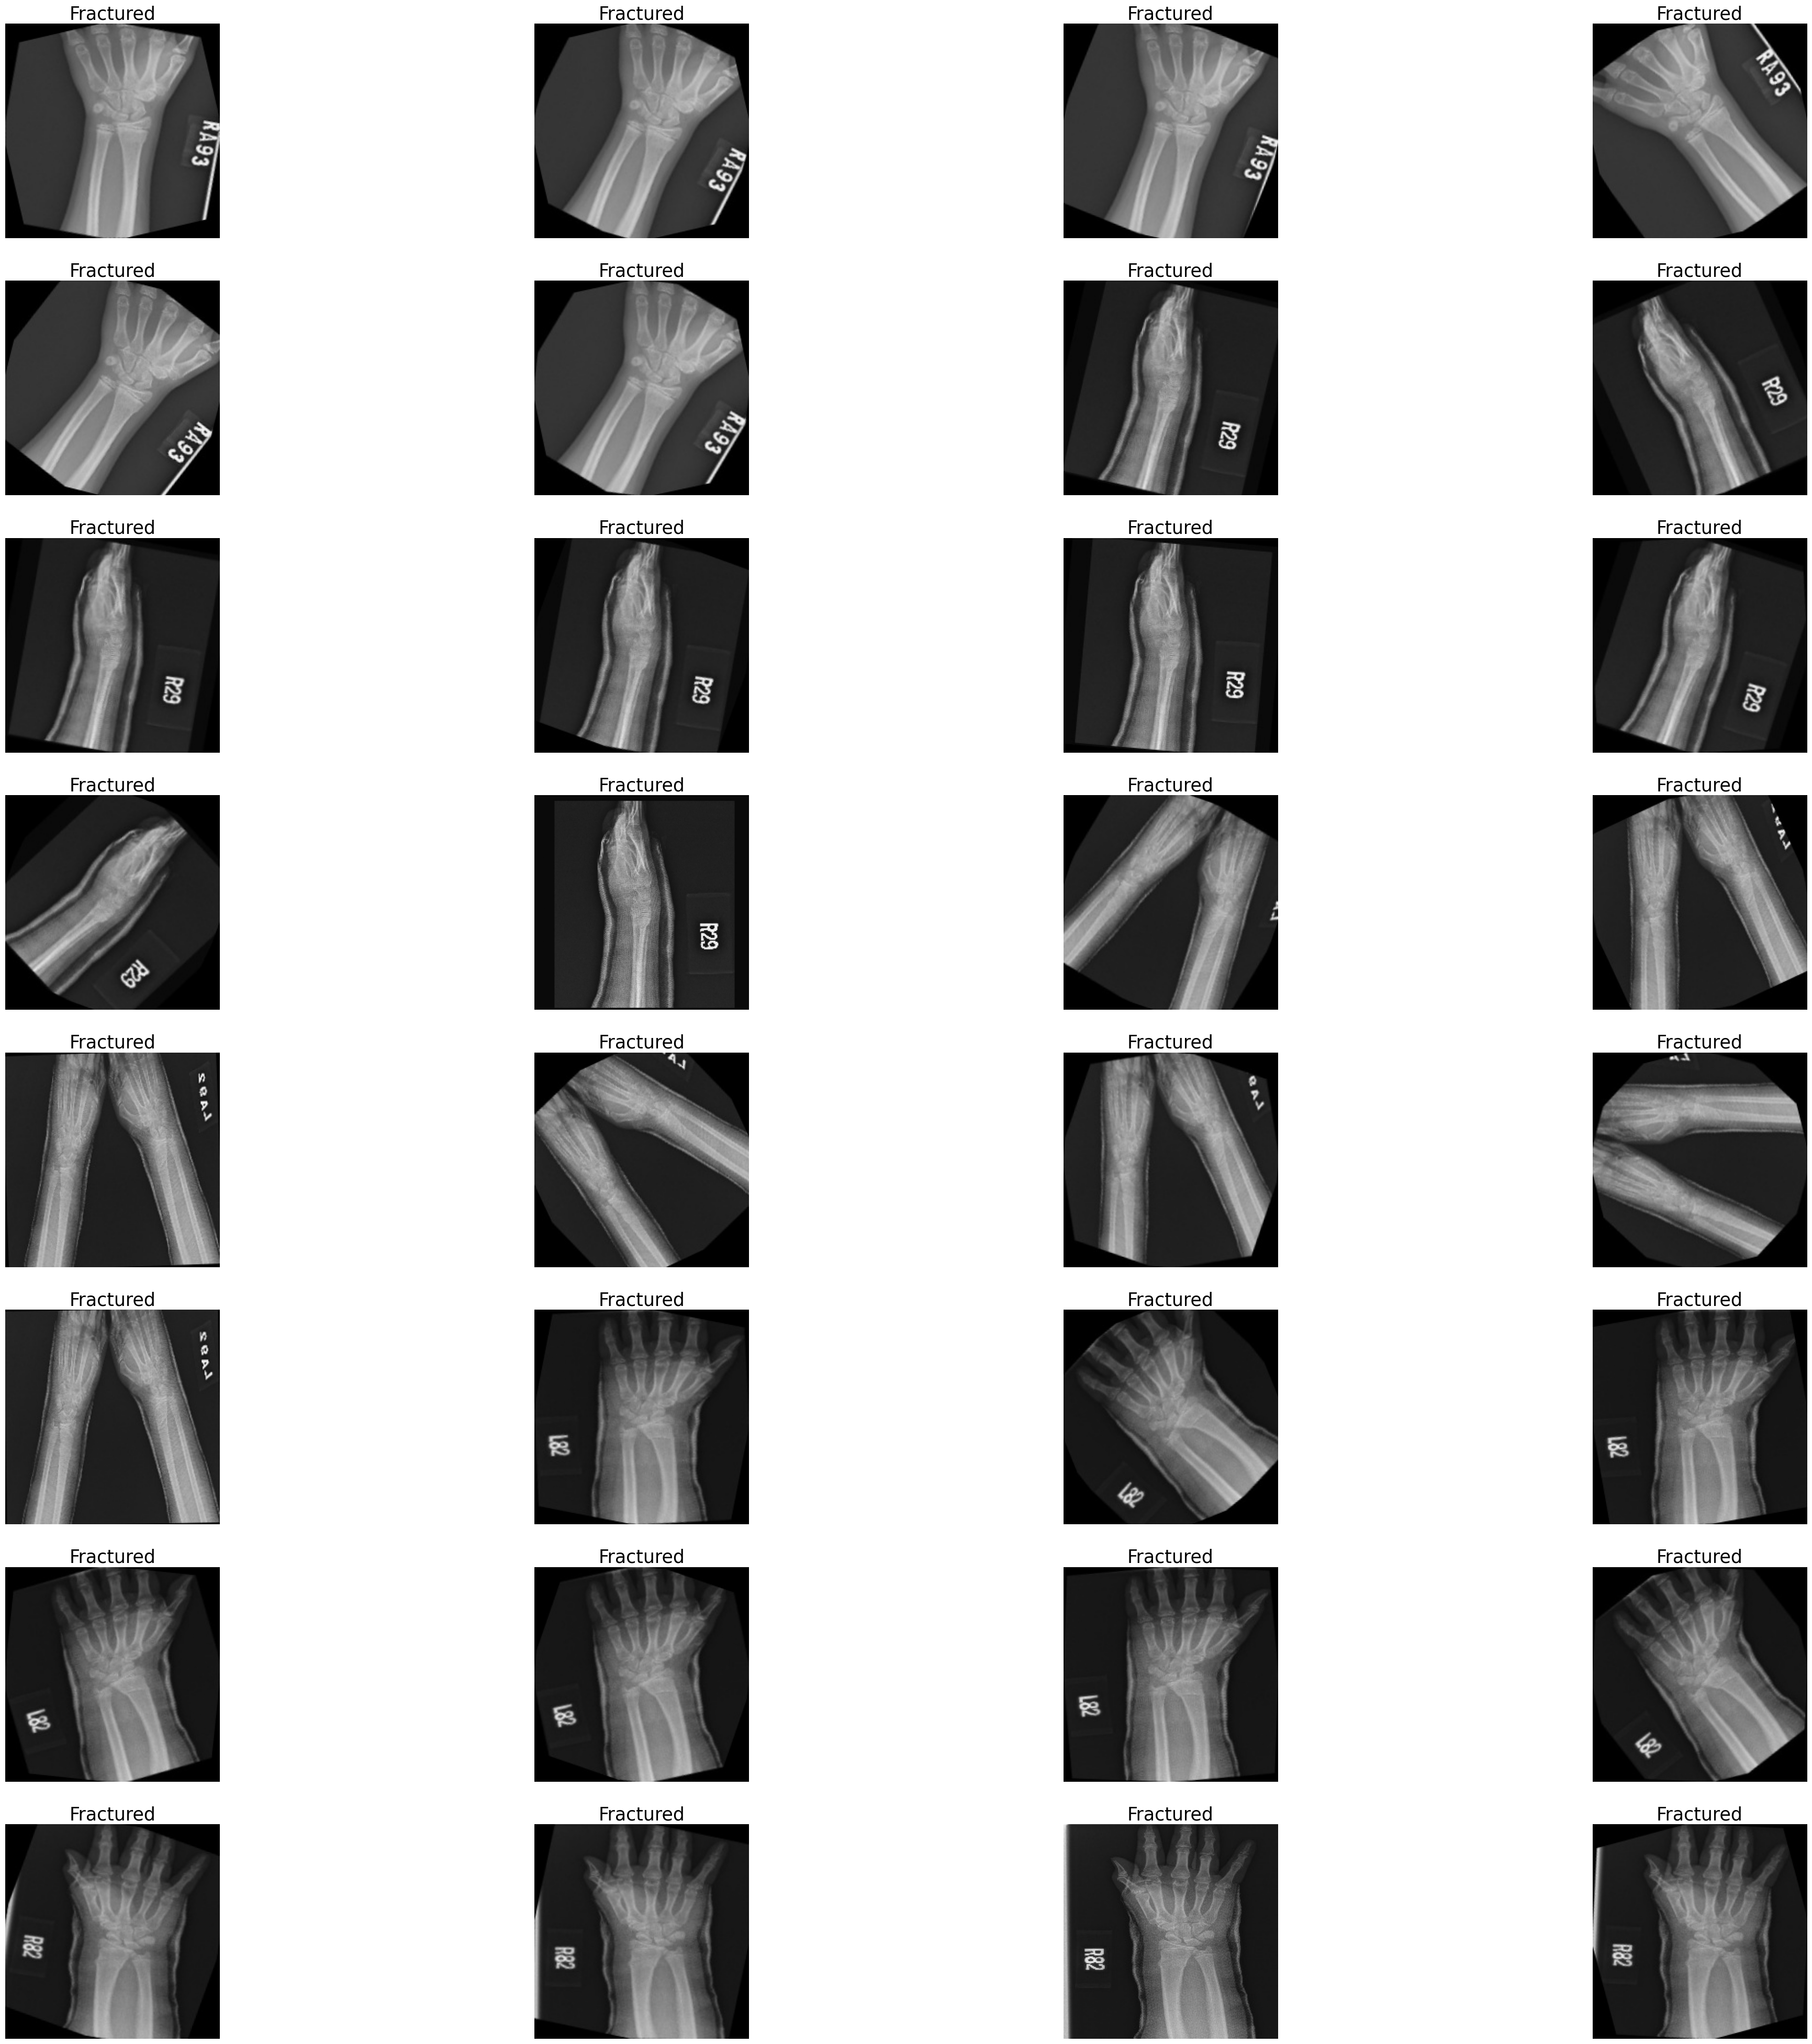

In [22]:
class_names=['Fractured', 'Not Fractured']
batch = next(test_data)
images= batch[0]
plt.figure(figsize=(50,50))
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(class_names[int(y_test[n])],fontsize=25)

In [17]:
from sklearn.metrics import classification_report

# Get true labels
y_true = test_data.classes  

# Get predicted labels
y_pred = (model.predict(test_data) > 0.5).astype("int32")

# Print classification report (includes F1-score)
print(classification_report(y_true, y_pred, target_names=['Non-Fractured', 'Fractured']))


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 193ms/step
               precision    recall  f1-score   support

Non-Fractured       0.97      0.99      0.98       199
    Fractured       0.99      0.97      0.98       200

     accuracy                           0.98       399
    macro avg       0.98      0.98      0.98       399
 weighted avg       0.98      0.98      0.98       399



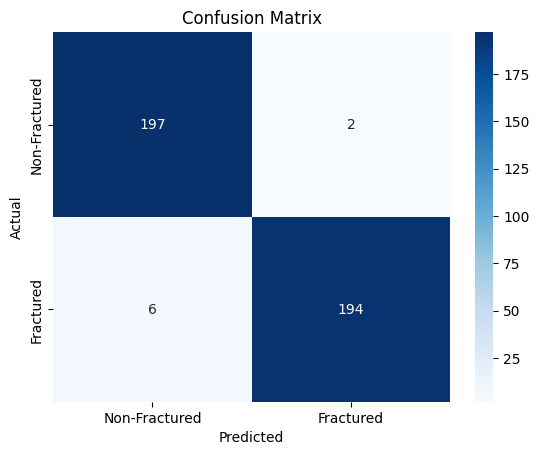

In [27]:
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fractured', 'Fractured'], yticklabels=['Non-Fractured', 'Fractured'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()